In [1]:
#!pip install exoplasim
#!pip install exoplasim[netCDF4,HDF5]

     |████████████████████████████████| 4.7 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 220 kB 79.2 MB/s eta 0:00:01


In [1]:
import exoplasim as exo
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Unit test of Astrobiology project

Some of my difficulties so far:
 - exoplasim crashes regularly - might be an important insight for my write up
 - Results are dependent on the number of cpus available - should perhaps look into performance issues - could attempt an HPC approach if the work is expanded on
 - a little bit of a black box - configuration gives some input choices but it is a lot of waiting for background work
 Some questions:
  - Should I work on getting more years? A little confused by what it means
  - Ways to improve the title

For this unit test, I will use the example planet - TOI700d - and will vary the pressure from 0.1 bar to 10 bar to the known pressure of 1.47 bar

In [3]:
toi700d = exo.Model(workdir="toi700d_run",modelname="TOI-700d",
                    ncpus=1,resolution="T21",outputtype=".npz")

Checking for /srv/conda/envs/notebook/lib/python3.7/site-packages/exoplasim/plasim/run/most_plasim_t21_l10_p1.x....


## Original specifications (1.47 bar)

In [4]:
toi700d.configure(startemp=3480.0, flux=1167.0,                           # Stellar parameters
                  eccentricity=0.,obliquity=0.,fixedorbit=True,           # Orbital parameters
                  synchronous=True,rotationperiod=37.426,                 # Rotation
                  radius=1.19,gravity=11.9,aquaplanet=True,               # Bulk properties
                  pN2=1.47*(1-360e-6),pCO2=1.47*360e-6,ozone=False,       # Atmosphere
                  timestep=30.0,snapshots=720,physicsfilter="gp|exp|sp")  # Model dynamics
toi700d.exportcfg()

Mean Molecular Weight set to 28.0192 g/mol
Writing configuration....
1
1167.0
3480.0
None
pN2|1.4694707999999999&pCO2|0.0005292000000000001
296.7420501316067
1.4699999999999998
1
0
37.426
1
180.0
None
11.9
1.19
0.0
0.0
None
1
None
1
0
0
gp|exp|sp
8.0
8
15.0
None
None
None
None
None
None
None
50.0
None
0
None
None
None
ECHAM-3
0
None
1
0
None
0
0
None
1.0
50.0
None
None
0
None
30.0
None
None
toggle|0&start|320&end|576&interval|4
720

None
None
0
4
VITHRESH|0.145&GPITHRESH|0.37&VMXTHRESH|33.0&LAVTHRESH|1.2e-05&VRMTHRESH|0.577&MINSURFTEMP|298.15&MAXSURFTEMP|373.15&WINDTHRESH|33.0&SWINDTHRESH|20.5&SIZETHRESH|30&ENDTHRESH|16&MINSTORMLEN|256&MAXSTORMLEN|1024&NKTRIGGER|0&toggle|0

None
0&2.0&-1.0
0.0005
0.0
None
None
0.0
Writing to /home/jovyan/demo/toi700d_run/TOI-700d.cfg....


In [5]:
toi700d.run(years=1,crashifbroken=True)

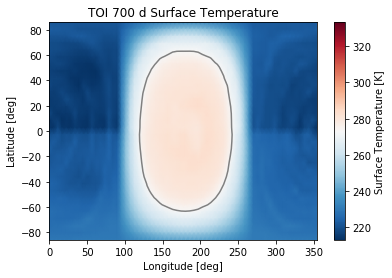

In [7]:
import matplotlib.pyplot as plt
lon = toi700d.inspect("lon")
lat = toi700d.inspect("lat")
ts = toi700d.inspect("ts",tavg=True)
im=plt.pcolormesh(lon,lat,ts,cmap="RdBu_r",vmin=273.15-60.0,vmax=273.15+60.0,shading="Gouraud")
plt.contour(lon,lat,ts,[273.15,],colors=['gray',])
plt.colorbar(im,label="Surface Temperature [K]")
plt.xlabel("Longitude [deg]")
plt.ylabel("Latitude [deg]")
plt.title("TOI 700 d Surface Temperature")
plt.show()

## 0.1 bar

In [8]:
toi700d.configure(startemp=3480.0, flux=1167.0,                           # Stellar parameters
                  eccentricity=0.,obliquity=0.,fixedorbit=True,           # Orbital parameters
                  synchronous=True,rotationperiod=37.426,                 # Rotation
                  radius=1.19,gravity=11.9,aquaplanet=True,               # Bulk properties
                  pN2=0.1*(1-360e-6),pCO2=0.1*360e-6,ozone=False,         # Atmosphere
                  timestep=30.0,snapshots=720,physicsfilter="gp|exp|sp"); # Model dynamics
toi700d.exportcfg();
toi700d.run(years=1,crashifbroken=True);

Mean Molecular Weight set to 28.0192 g/mol
Writing configuration....
1
1167.0
3480.0
None
pN2|0.099964&pCO2|3.6e-05
296.7420501316067
0.09999999999999999
1
0
37.426
1
180.0
None
11.9
1.19
0.0
0.0
None
1
None
1
0
0
gp|exp|sp
8.0
8
15.0
None
None
None
None
None
None
None
50.0
None
0
None
None
None
ECHAM-3
0
None
1
0
None
0
0
None
1.0
50.0
None
None
0
None
30.0
None
None
toggle|0&start|320&end|576&interval|4
720

None
None
0
4
VITHRESH|0.145&GPITHRESH|0.37&VMXTHRESH|33.0&LAVTHRESH|1.2e-05&VRMTHRESH|0.577&MINSURFTEMP|298.15&MAXSURFTEMP|373.15&WINDTHRESH|33.0&SWINDTHRESH|20.5&SIZETHRESH|30&ENDTHRESH|16&MINSTORMLEN|256&MAXSTORMLEN|1024&NKTRIGGER|0&toggle|0

None
0&2.0&-1.0
0.0005
0.0
None
None
0.0
Writing to /home/jovyan/demo/toi700d_run/TOI-700d.cfg....


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
lon = toi700d.inspect("lon")
lat = toi700d.inspect("lat")
ts = toi700d.inspect("ts",tavg=True)
im=plt.pcolormesh(lon,lat,ts,cmap="RdBu_r",vmin=273.15-60.0,vmax=273.15+60.0,shading="Gouraud")
plt.contour(lon,lat,ts,[273.15,],colors=['gray',])
plt.colorbar(im,label="Surface Temperature [K]")
plt.xlabel("Longitude [deg]")
plt.ylabel("Latitude [deg]")
plt.title("TOI 700 d (if pressure were 0.1bar) Surface Temperature")
plt.show()